In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving moore.csv to moore.csv


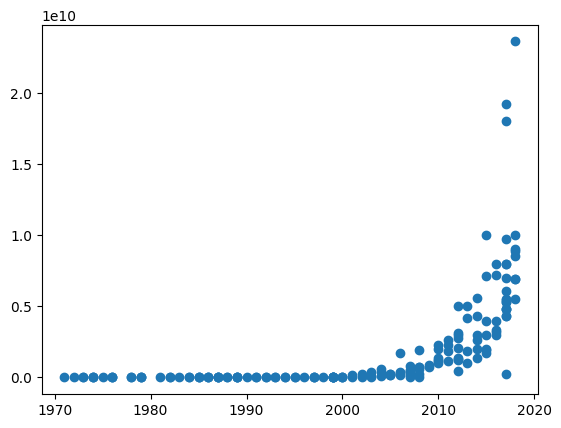

In [ ]:
# header=None: 첫 번째 줄을 열 이름(header)이 아니라 일반 데이터로 처리
# .values: DataFrame이 아닌 NumPy 배열(ndarray)로 변환
data = pd.read_csv('moore.csv', header=None).values

# X 데이터: 0번 열 (보통 연도, 예: 1971, 1972, ...)
# reshape(-1, 1): (n,) 형태의 1차원 배열을 (n,1) 형태의 2차원으로 변환
# → 머신러닝 모델에 입력으로 넣기 위해 필요한 처리
X = data[:, 0].reshape(-1, 1)

# Y 데이터: 1번 열 (보통 트랜지스터 수, 예: 2300, 3500, ...)
# reshape(-1, 1): 마찬가지로 2차원으로 변환
Y = data[:, 1].reshape(-1, 1)

# matplotlib를 이용하여 X와 Y의 관계를 시각화 (산점도)
# X축: 연도, Y축: 트랜지스터 수
plt.scatter(X, Y)


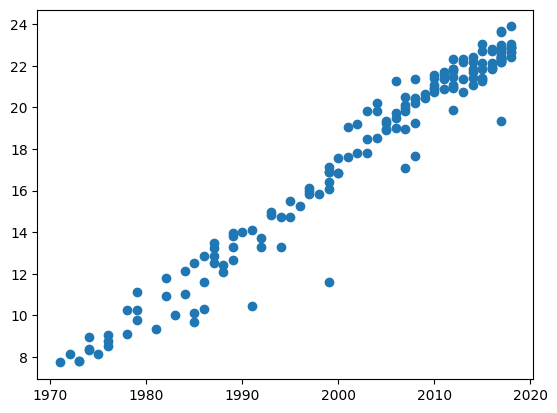

In [ ]:
Y_log = np.log(Y)
plt.scatter(X, Y_log)  # 로그로 변환한 값 시각화

In [ ]:
# X 데이터에 대해 평균과 표준편차를 계산한 후 표준화 수행

# 1. X의 평균(mean) 계산
mx = X.mean()  # 전체 X 값들의 평균 → 중심을 0으로 이동시키기 위해 사용

# 2. X의 표준편차(standard deviation) 계산
sx = X.std()   # 전체 X 값들의 퍼짐 정도 → 값의 분포를 일정하게 맞추기 위해 사용

# 3. 표준화(standardization) 수행
#    각 X 값에서 평균을 빼고, 표준편차로 나눠서 데이터 분포를 평균 0, 표준편차 1로 맞춤
#    이는 모델 학습에서 입력값의 크기를 균일하게 하여, 학습 안정성과 속도를 높임
X = (X - mx) / sx

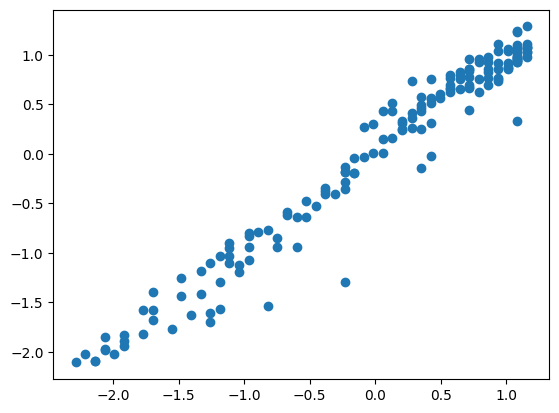

In [ ]:
# y 표준화 (평균 0, 표준편차 1)
my = Y_log.mean()
sy = Y_log.std()
Y = (Y_log - my) / sy

plt.scatter(X, Y)

In [ ]:
# numpy 배열의 기본 자료형은 종종 float64(64비트)인데,
# PyTorch는 기본적으로 float32(32비트)를 사용함.
# 따라서 float64 → float32로 변환해주면, 효율이 더 좋고
# PyTorch 연산에서 자료형 불일치 오류를 방지할 수 있음

X = X.astype(np.float32)  # 입력 데이터 X를 float32 타입으로 변환
Y = Y.astype(np.float32)  # 타겟 데이터 Y를 float32 타입으로 변환


In [ ]:
# PyTorch에서 선형 회귀 모델 생성

# nn.Linear(in_features, out_features)
# in_features: 입력 차원 수
# out_features: 출력 차원 수

# 여기서 nn.Linear(1, 1)은 다음 의미를 가짐:
# - 입력값 x가 1개의 숫자일 때 (즉, 1차원 스칼라)
# - 출력값 y도 1개의 숫자 (예: 예측값)

# 내부적으로는 다음 수식을 학습함:
#   y = wx + b
# - w: 가중치(weight), b: 편향(bias)
# - 학습을 통해 w, b를 최적값으로 조정

# 예: x = 2일 때 → y = w * 2 + b 로 출력 계산

model = nn.Linear(1, 1)  # 입력 1차원, 출력 1차원인 선형 모델 생성

In [ ]:
criterion = nn.MSELoss()
# MSELoss: 평균제곱오차(Mean Squared Error) 손실 함수
# 회귀 문제(예측값과 실제값의 차이를 최소화)에서 주로 사용
# 수식: MSE = (1/n) * Σ(y_pred - y_true)^2
# 값이 작을수록 모델의 예측이 실제값에 가까움을 의미

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)
# SGD: 확률적 경사하강법(Stochastic Gradient Descent)
# 모델 파라미터(가중치, 편향)를 loss의 gradient 방향으로 갱신
# model.parameters(): 학습해야 할 파라미터 목록 (w, b 등)

# lr (learning rate): 학습률 (한 번의 업데이트에 얼마나 이동할지 결정)
# 값이 너무 크면 발산, 너무 작으면 수렴 속도 느림
# 일반적으로 0.001 ~ 0.1 사이에서 실험적으로 결정

# momentum: 관성(momentum) 개념을 도입하여 이전의 gradient 방향을 반영함
# 지역 최소값에 갇히는 현상을 완화
# 값은 일반적으로 0.5 ~ 0.9 사이

In [ ]:
# epochs = 100으로 모델을 트레이닝 하시고 loss 그래프를 그려보세요

# 일단 모델 트레이닝
n_epochs = 100
losses = []   # 에폭별 손실 저장

# torch tensor로 변환
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

for epoch in range(n_epochs):
    optimizer.zero_grad()                   # 이전 gradient 초기화

    outputs = model(inputs)                 # 예측값 계산
    loss = criterion(outputs, targets)      # 손실 계산

    loss.backward()                         # 손실에 대해 gradient 계산
    optimizer.step()                        # 파라미터 업데이트

    losses.append(loss.item())              # loss 값을 리스트에 저장
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 3.9230
Epoch 2/100, Loss: 3.7691
Epoch 3/100, Loss: 3.5177
Epoch 4/100, Loss: 3.2126
Epoch 5/100, Loss: 2.8858
Epoch 6/100, Loss: 2.5594
Epoch 7/100, Loss: 2.2472
Epoch 8/100, Loss: 1.9578
Epoch 9/100, Loss: 1.6952
Epoch 10/100, Loss: 1.4608
Epoch 11/100, Loss: 1.2542
Epoch 12/100, Loss: 1.0738
Epoch 13/100, Loss: 0.9176
Epoch 14/100, Loss: 0.7831
Epoch 15/100, Loss: 0.6680
Epoch 16/100, Loss: 0.5697
Epoch 17/100, Loss: 0.4862
Epoch 18/100, Loss: 0.4153
Epoch 19/100, Loss: 0.3554
Epoch 20/100, Loss: 0.3048
Epoch 21/100, Loss: 0.2621
Epoch 22/100, Loss: 0.2262
Epoch 23/100, Loss: 0.1959
Epoch 24/100, Loss: 0.1705
Epoch 25/100, Loss: 0.1492
Epoch 26/100, Loss: 0.1312
Epoch 27/100, Loss: 0.1162
Epoch 28/100, Loss: 0.1036
Epoch 29/100, Loss: 0.0930
Epoch 30/100, Loss: 0.0842
Epoch 31/100, Loss: 0.0767
Epoch 32/100, Loss: 0.0705
Epoch 33/100, Loss: 0.0653
Epoch 34/100, Loss: 0.0609
Epoch 35/100, Loss: 0.0573
Epoch 36/100, Loss: 0.0542
Epoch 37/100, Loss: 0.0516
Epoch 38/1

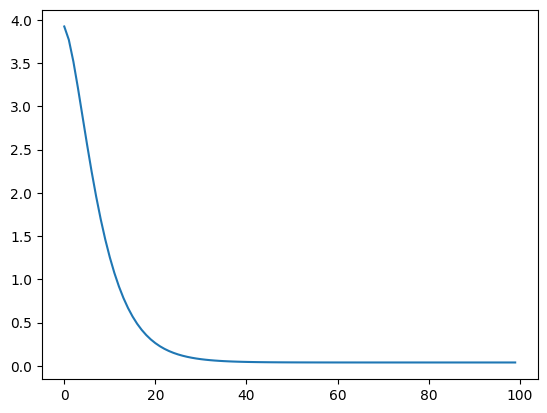

In [ ]:
# 그래프로 보자

plt.plot(losses)
plt.show()

In [ ]:
# 실제 데이터값 위에 예측결과를 그래프로 그리세요

predicted = model(inputs).detach().numpy()  # tensor → numpy 변환

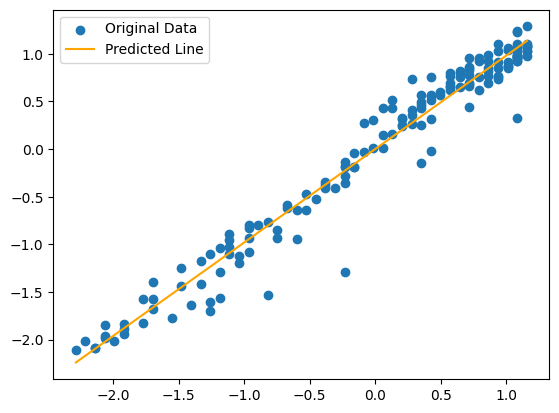

In [ ]:
plt.scatter(X, Y, label='Original Data')    # 실제 데이터
plt.plot(X, predicted, color='orange', label='Predicted Line')  # 예측 직선
plt.legend()
plt.show()